In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
\
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_mean,unit_liquid_cost_perc_std,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_mean,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.0,0.000000,0.0,0.02439,0.048780,0.146341,0.146341,...,0.664485,0.139084,0.873420,0.495834,0.713632,1.574080,0.339841,2.016804,1.144924,1.401282
d408e1b5e841dde4e15a4cfa182e3812,5,0.013333,0.0,0.0,0.026667,0.0,0.00000,0.040000,0.040000,0.080000,...,0.667039,0.168905,0.904901,0.198069,0.739112,1.441776,0.275338,1.999516,1.105093,1.334629
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.0,0.000000,0.0,0.00000,0.017045,0.051136,0.210227,...,0.547610,0.128811,0.741435,0.209398,0.573237,1.791870,0.389380,2.791206,1.294306,1.574516
723f73c85e91fc31d147dfade389d4f9,0,0.034000,0.0,0.0,0.002000,0.0,0.03400,0.044000,0.078000,0.116000,...,0.767880,0.063620,1.014705,0.353106,0.768454,1.307263,0.099146,1.637204,0.985509,1.301313
54209126056016c7c391c0c8fd8e6eff,0,0.013746,0.0,0.0,0.000000,0.0,0.00000,0.024055,0.079038,0.096220,...,0.586322,0.113344,0.897872,0.263493,0.544282,1.749869,0.313052,2.351887,1.113744,1.798905


In [5]:
df_products.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a',
       ...
       'unit_liquid_cost_perc_mean', 'unit_liquid_cost_perc_std',
       'unit_liquid_cost_perc_max', 'unit_liquid_cost_perc_min',
       'unit_liquid_cost_perc_percentile_50', 'unit_markup_mean',
       'unit_markup_std', 'unit_markup_max', 'unit_markup_min',
       'unit_markup_percentile_50'],
      dtype='object', length=237)

## Using Elbow optimization with KMeans

In [6]:
df_products.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a',
       ...
       'unit_liquid_cost_perc_mean', 'unit_liquid_cost_perc_std',
       'unit_liquid_cost_perc_max', 'unit_liquid_cost_perc_min',
       'unit_liquid_cost_perc_percentile_50', 'unit_markup_mean',
       'unit_markup_std', 'unit_markup_max', 'unit_markup_min',
       'unit_markup_percentile_50'],
      dtype='object', length=237)

In [7]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products, max_k=130, step=2)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 47.95976489151791
error = 47.95976489151791
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 39.580905222922254
error = 8.378859668595652
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 35.45863255078402
error = 4.122272672138237
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 32.199636968464986
error = 3.258995582319031
###############################
Number of Clusters: 10
Starting K-means++
Finished
J = 29.84885354878153
error = 2.350783419683456
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 27.564505891337415
error = 2.2843476574441155
###############################
Number of Clusters: 14
Starting K-means++
Finished
J = 25.619383454546444
error = 1.945122436790971
###############################
Number of Clusters: 16
Starting K-means++
Finished

Finished
J = 0.08926380658363539
error = 0.07169201782440487
###############################
Number of Clusters: 128
Starting K-means++
Finished
J = 0.0375274647919648
error = 0.05173634179167059
###############################
Number of Clusters: 130
Starting K-means++
Finished
J = 0.0
error = 0.0375274647919648
###############################

Best k: 130
Number of iterations: 66
Error threshold  True


J  [47.95976489151791, 39.580905222922254, 35.45863255078402, 32.199636968464986, 29.84885354878153, 27.564505891337415, 25.619383454546444, 23.991989380731965, 22.986572784479428, 21.87504768880876, 20.549461722300958, 19.362657884854823, 18.677661971417262, 18.09817654006872, 17.296002875672432, 16.06461658064178, 15.460593011707232, 14.907632717271351, 14.15295820903231, 13.257440900005916, 12.755219734622468, 12.097740269142875, 11.437497444316573, 10.753152260695405, 10.182024878760894, 9.635228575629963, 9.168197325256171, 8.792672445232464, 8.163974431526826, 7.847782125757693, 7.385493945434974, 6.95696090085603, 6.419769150520636, 6.1352870260208805, 5.768689455441771, 5.377668140551589, 5.080873771831049, 4.748079746449949, 4.444673839441517, 4.195099527130864, 3.9217758088719457, 3.6650147325151594, 3.3057264299126348, 3.0861217032420556, 2.8404401574585094, 2.6683113430342327, 2.4928762814185674, 2.3213130066382797, 2.0531839390053985, 1.852859164998572, 1.6364949808064788,

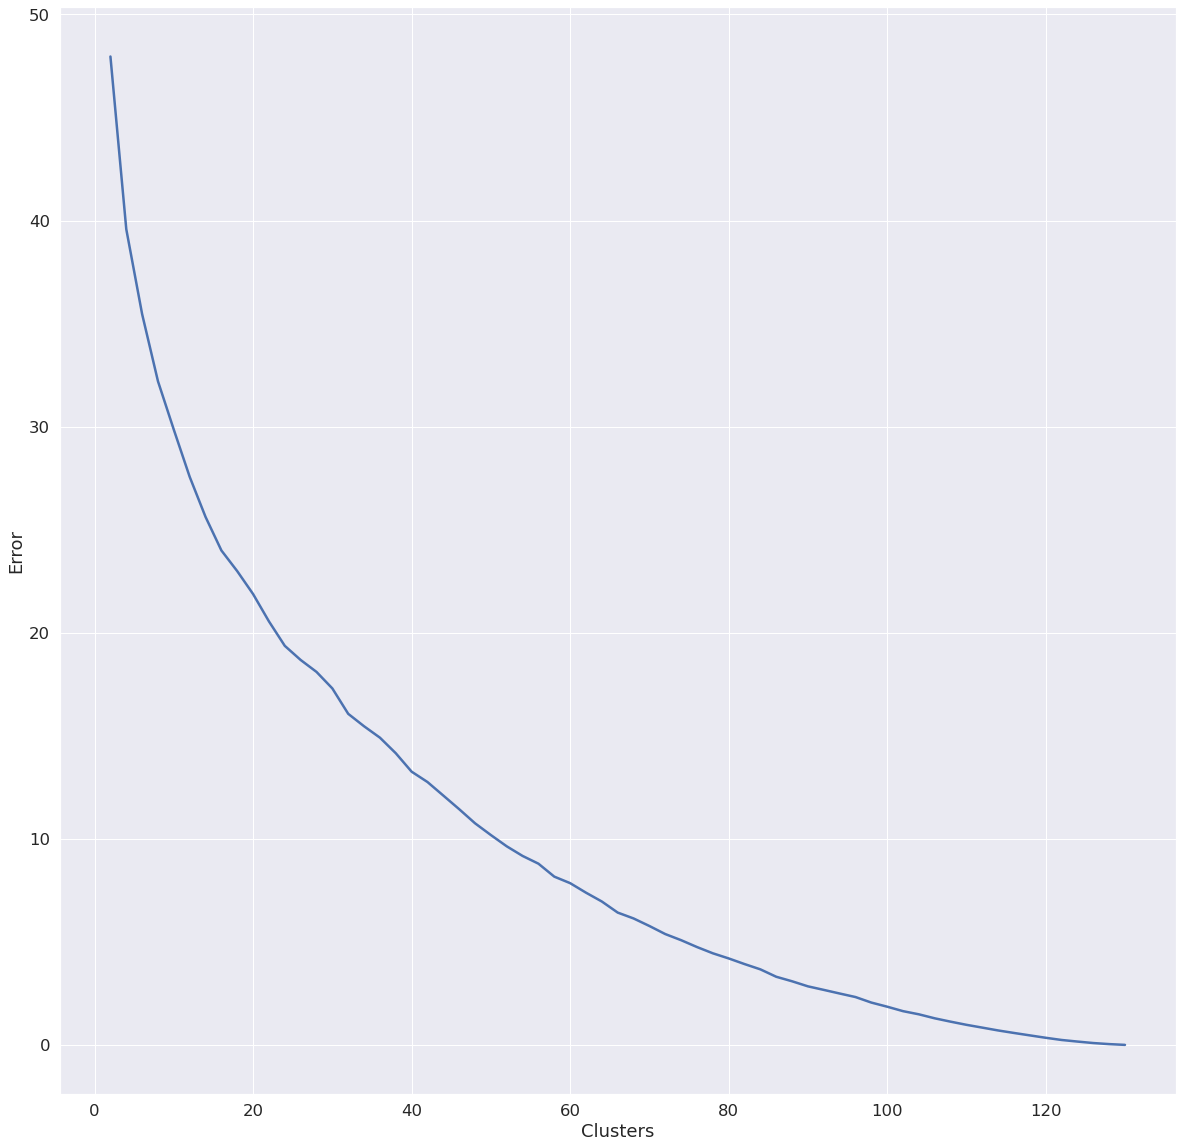

In [8]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

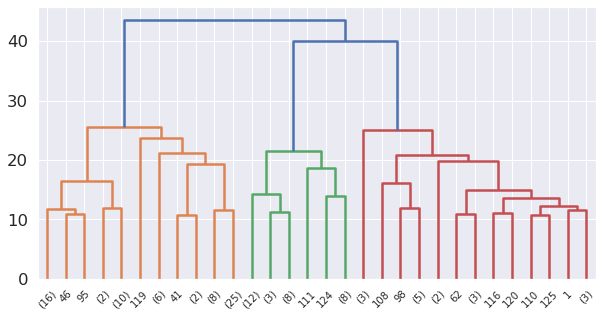

In [9]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products)

In [10]:
clusters = _optimizer.fcluster_cut(df_products.values, max_d=2)
clusters.shape, len(np.unique(clusters))

((130,), 130)